<a href="https://colab.research.google.com/github/jeba0909/EDA/blob/main/21BDS0320_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 4**

In [13]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load dataset
data = pd.read_csv('/content/PPGE.csv')



In [15]:

# 1. Data Summarization
# 1-D Statistical Analysis
print("1-D Statistical Summary:\n", data.describe())

1-D Statistical Summary:
           rownames         year  govtspendgdp     tradegdp      kaopen  \
count  1020.000000  1020.000000   1020.000000  1010.000000  988.000000   
mean    510.500000  1995.000000     43.250523    66.694034    1.504243   
std     294.592939    14.726822      9.652520    35.601656    1.181443   
min       1.000000  1970.000000      9.884450    10.757179   -1.927032   
25%     255.750000  1982.000000     36.351305    42.375743    1.041311   
50%     510.500000  1995.000000     44.598823    59.896726    2.310613   
75%     765.250000  2008.000000     50.552823    82.292425    2.310613   
max    1020.000000  2020.000000     69.400000   252.249498    2.310613   

          ka_open   v2catrauni  v2catrauni_ord  
count  988.000000  1020.000000     1020.000000  
mean     0.809713     1.543327        2.864706  
std      0.278797     0.931571        0.814087  
min      0.000000    -2.304000        0.000000  
25%      0.700470     0.742500        2.000000  
50%      1.00

In [16]:

# 2-D Statistical Analysis: Correlation, Covariance, and Contingency Table
# Numeric columns for correlation and covariance calculations
numeric_cols = data.select_dtypes(include=np.number).columns

# Correlation Matrix
correlation_matrix = data[numeric_cols].corr()
print("2-D Statistical Analysis (Correlation Matrix):\n", correlation_matrix)


2-D Statistical Analysis (Correlation Matrix):
                 rownames      year  govtspendgdp  tradegdp    kaopen  \
rownames        1.000000  0.049990     -0.050612 -0.118048 -0.020942   
year            0.049990  1.000000      0.317508  0.365321  0.656171   
govtspendgdp   -0.050612  0.317508      1.000000  0.316232  0.327163   
tradegdp       -0.118048  0.365321      0.316232  1.000000  0.236321   
kaopen         -0.020942  0.656171      0.327163  0.236321  1.000000   
ka_open        -0.020942  0.656171      0.327163  0.236321  1.000000   
v2catrauni      0.020160 -0.146211      0.333686  0.142485 -0.203918   
v2catrauni_ord  0.062292 -0.131541      0.281070  0.112393 -0.216500   

                 ka_open  v2catrauni  v2catrauni_ord  
rownames       -0.020942    0.020160        0.062292  
year            0.656171   -0.146211       -0.131541  
govtspendgdp    0.327163    0.333686        0.281070  
tradegdp        0.236321    0.142485        0.112393  
kaopen          1.000000   -

In [17]:

# Covariance Matrix
covariance_matrix = data[numeric_cols].cov()
print("2-D Statistical Analysis (Covariance Matrix):\n", covariance_matrix)


2-D Statistical Analysis (Covariance Matrix):
                     rownames        year  govtspendgdp     tradegdp  \
rownames        86785.000000  216.879293   -143.917616 -1237.753619   
year              216.879293  216.879293     45.134055   190.590766   
govtspendgdp     -143.917616   45.134055     93.171152   107.881236   
tradegdp        -1237.753619  190.590766    107.881236  1267.477895   
kaopen             -7.292752   11.399913      3.686727    10.010014   
ka_open            -1.720944    2.690153      0.869994     2.362164   
v2catrauni          5.532509   -2.005881      3.000508     4.727943   
v2catrauni_ord     14.939156   -1.577036      2.208643     3.255227   

                   kaopen   ka_open  v2catrauni  v2catrauni_ord  
rownames        -7.292752 -1.720944    5.532509       14.939156  
year            11.399913  2.690153   -2.005881       -1.577036  
govtspendgdp     3.686727  0.869994    3.000508        2.208643  
tradegdp        10.010014  2.362164    4.727943  

In [18]:
# Contingency Table for Categorical Variables (if at least 2 categorical variables exist)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) >= 2:
    contingency_table = pd.crosstab(data[categorical_cols[0]], data[categorical_cols[1]])
    print("2-D Statistical Analysis (Contingency Table):\n", contingency_table)
else:
    print("Not enough categorical columns for a contingency table.")


2-D Statistical Analysis (Contingency Table):
 iso3c           AUS  AUT  BEL  CAN  CHE  DEU  DNK  ESP  FIN  FRA  GBR  GRC  \
country                                                                      
Australia        51    0    0    0    0    0    0    0    0    0    0    0   
Austria           0   51    0    0    0    0    0    0    0    0    0    0   
Belgium           0    0   51    0    0    0    0    0    0    0    0    0   
Canada            0    0    0   51    0    0    0    0    0    0    0    0   
Denmark           0    0    0    0    0    0   51    0    0    0    0    0   
Finland           0    0    0    0    0    0    0    0   51    0    0    0   
France            0    0    0    0    0    0    0    0    0   51    0    0   
Germany           0    0    0    0    0   51    0    0    0    0    0    0   
Greece            0    0    0    0    0    0    0    0    0    0    0   51   
Ireland           0    0    0    0    0    0    0    0    0    0    0    0   
Italy            

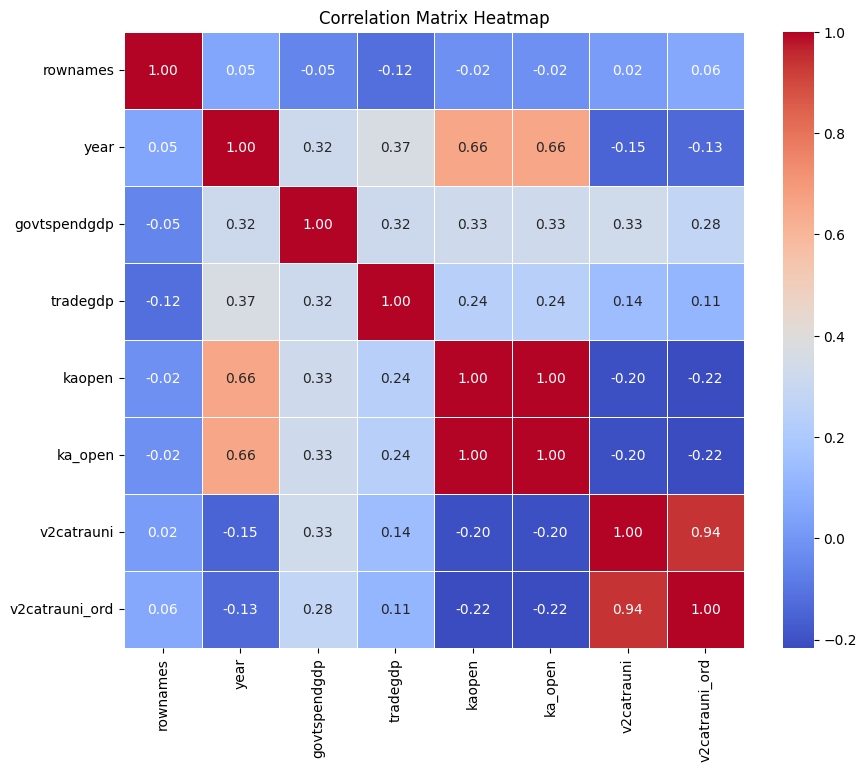

In [19]:

# 2. Visualization

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


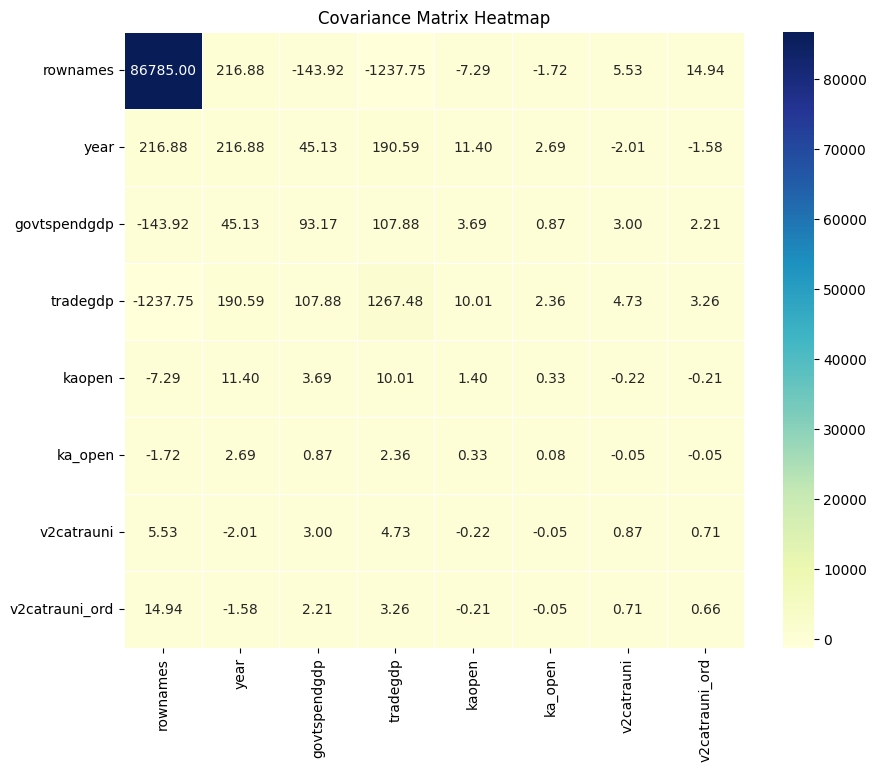

In [20]:

# Covariance Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Covariance Matrix Heatmap")
plt.show()



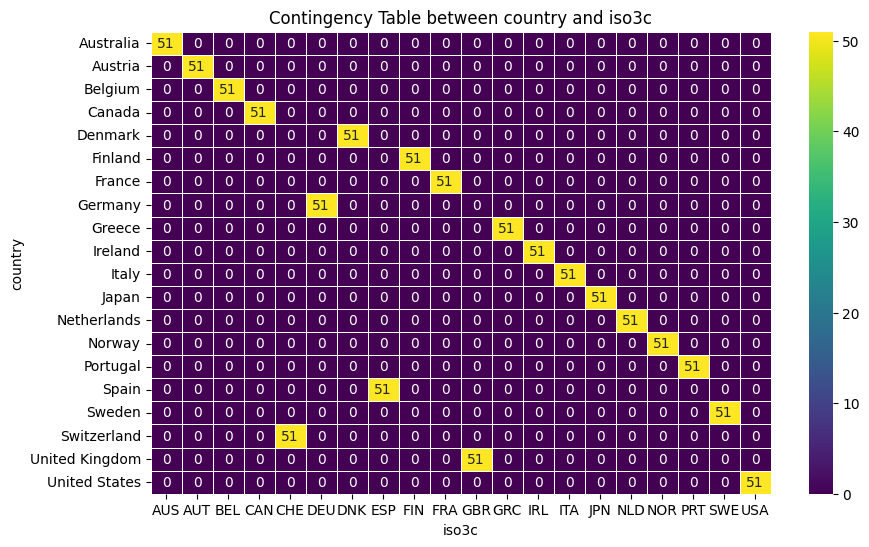

In [21]:
# Contingency Table Heatmap (if applicable)
if len(categorical_cols) >= 2:
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, cmap="viridis", fmt="d", linewidths=0.5)
    plt.title(f"Contingency Table between {categorical_cols[0]} and {categorical_cols[1]}")
    plt.xlabel(categorical_cols[1])
    plt.ylabel(categorical_cols[0])
    plt.show()

n-D Statistical Analysis Summary completed


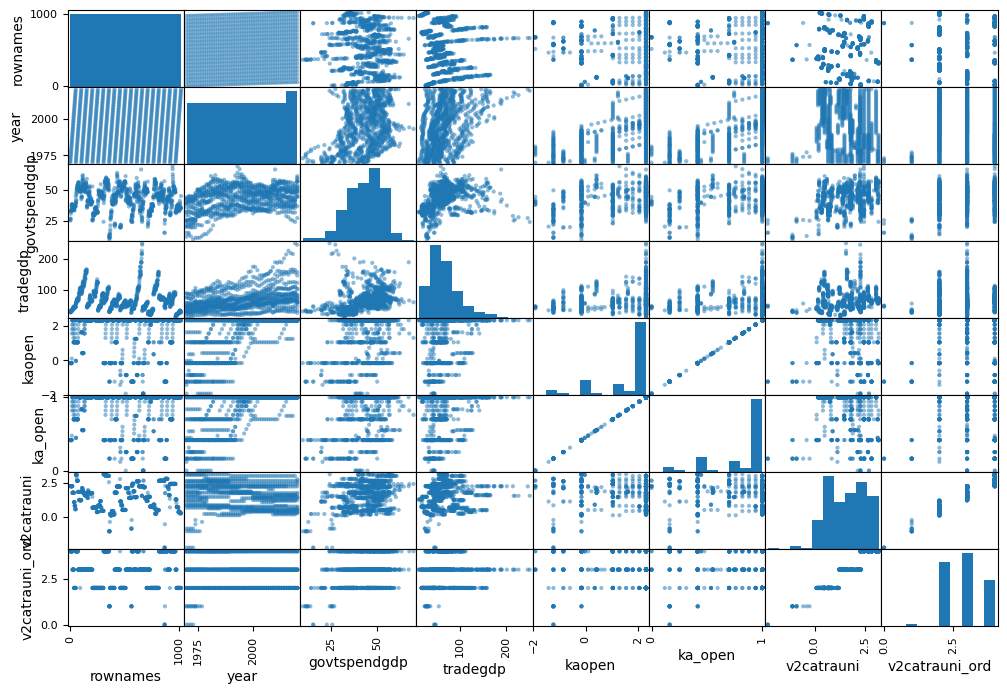

In [22]:
# n-D Statistical Analysis
# Pairwise relationships to understand the interaction between multiple variables
n_dim_summary = pd.plotting.scatter_matrix(data.select_dtypes(include=np.number), figsize=(12, 8))
print("n-D Statistical Analysis Summary completed")

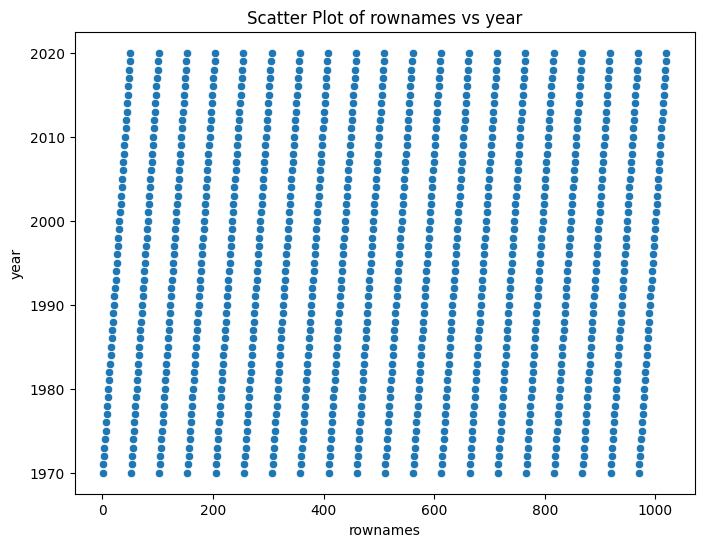

In [23]:
# Scatter Plot
num_cols = data.select_dtypes(include=np.number).columns
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=num_cols[0], y=num_cols[1], data=data)
    plt.title(f"Scatter Plot of {num_cols[0]} vs {num_cols[1]}")
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.show()

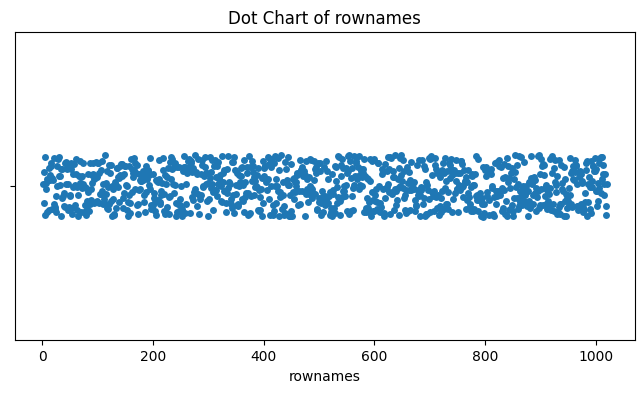

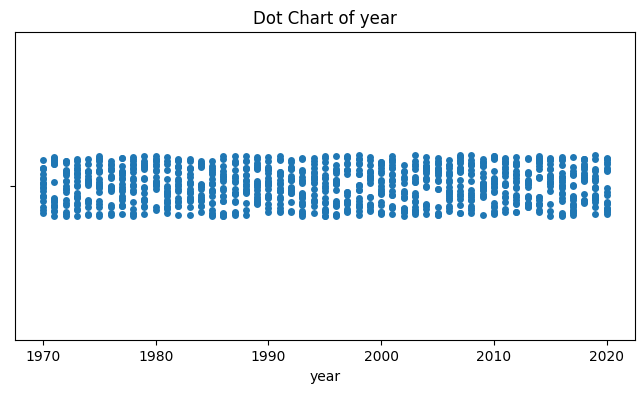

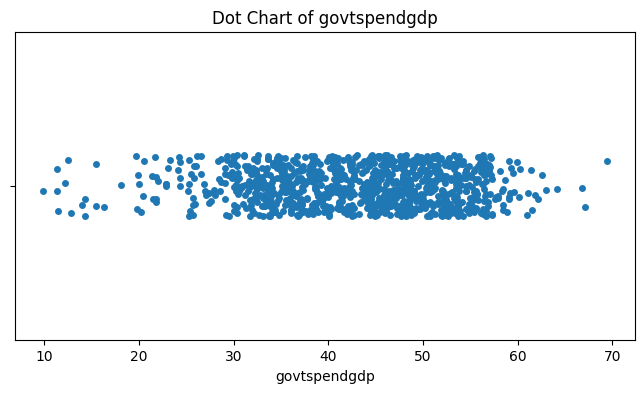

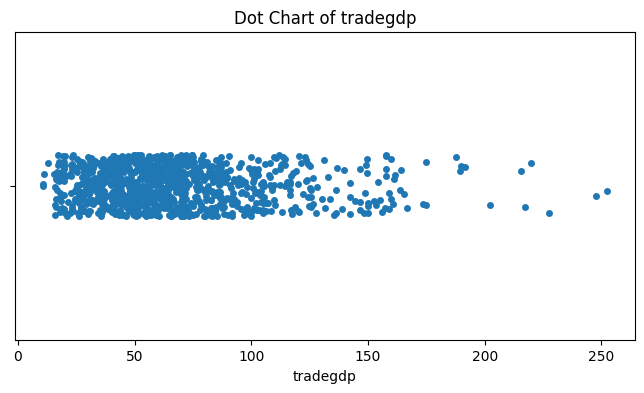

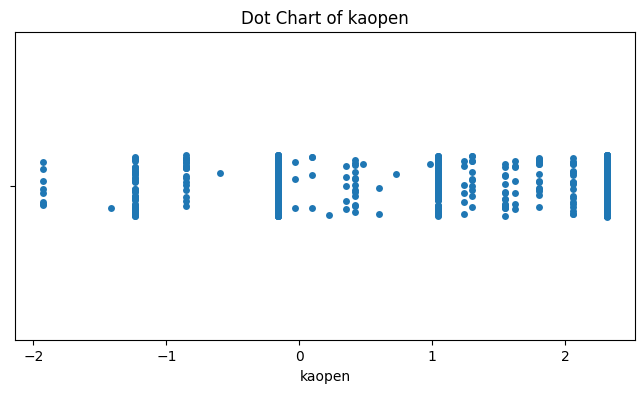

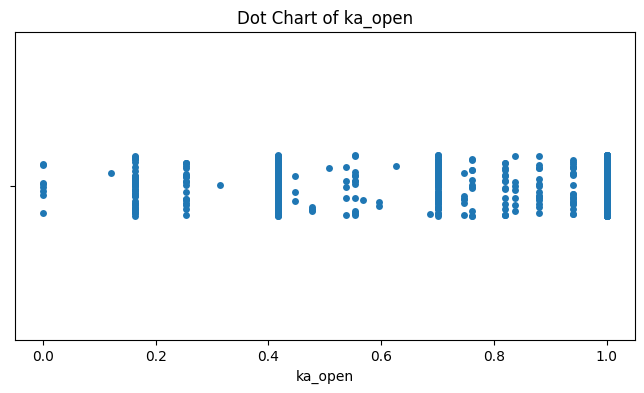

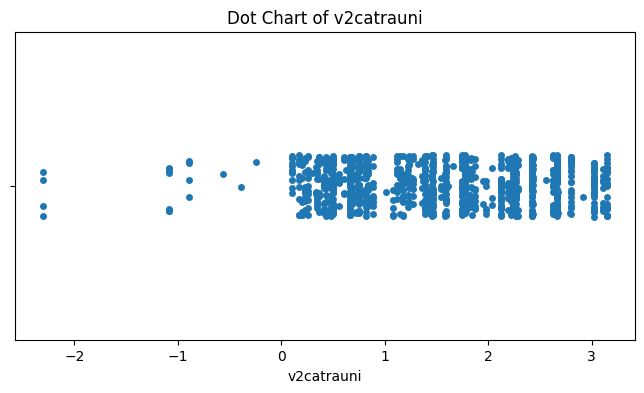

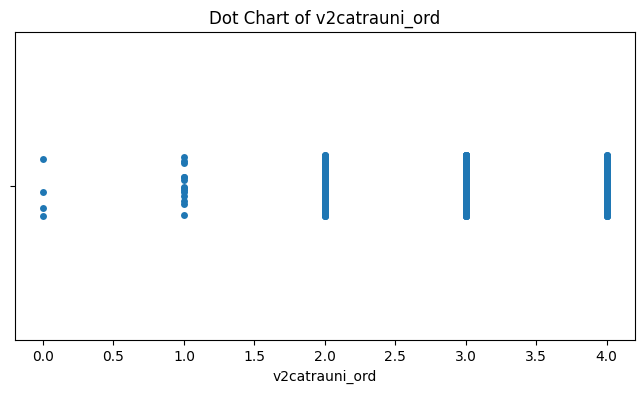

In [24]:
# Dot Chart
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.stripplot(x=data[col], jitter=True)
    plt.title(f"Dot Chart of {col}")
    plt.xlabel(col)
    plt.show()

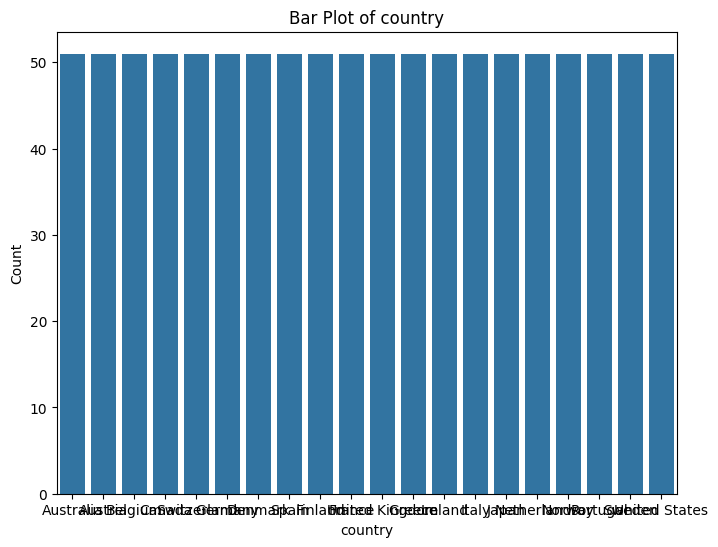

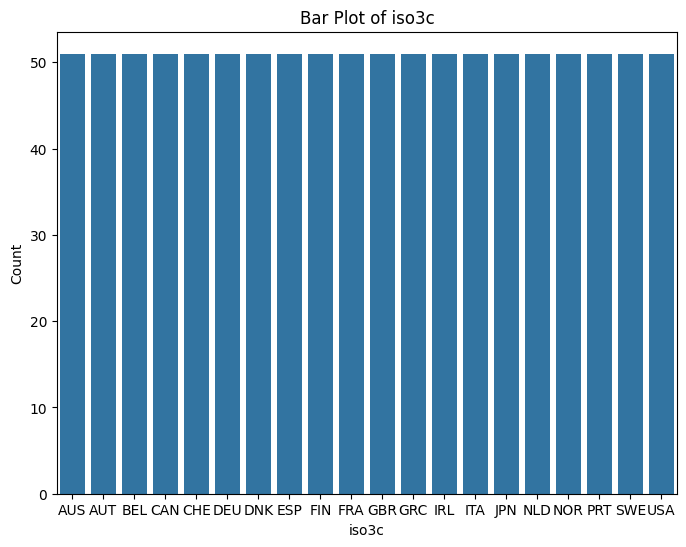

In [25]:
# Bar Plot for Categorical Variable Distribution
for cat_col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=cat_col, data=data)
    plt.title(f"Bar Plot of {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel("Count")
    plt.show()